# M.A.D. Python Libraries - `seaborn`

<span style="color:red;">**M.A.D.** => **M**achine **L**earning and **D**ata Science<span>

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Prereqs:**
* Pandas Workbook or a good grasp of data manipulation techniques using pandas
    
*Checkout the Python Libraries for Data Manipulation Workbook for a numpy and pandas review.*
    
**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Seaborn Intro
* Exploring Data with Seaborn
* Exercises

# Workbook Setup

## Troubleshooting Tips

If you run into issues running any of the code in this notebook, check your version of Jupyter, extensions, etc.

```bash
!jupyter --version

jupyter core     : 4.6.1
jupyter-notebook : 6.0.2
qtconsole        : not installed
ipython          : 7.9.0
ipykernel        : 5.1.3
jupyter client   : 5.3.4
jupyter lab      : 1.2.3
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 4.4.0
traitlets        : 4.3.3
```

```bash
!jupyter-labextension list

JupyterLab v1.2.3
Known labextensions:
   app dir: /usr/local/share/jupyter/lab
        @aquirdturtle/collapsible_headings v0.5.0  enabled  OK
        @jupyter-widgets/jupyterlab-manager v1.1.0  enabled  OK
        @jupyterlab/git v0.8.2  enabled  OK
        @jupyterlab/github v1.0.1  enabled  OK
        jupyterlab-flake8 v0.4.0  enabled  OK

Uninstalled core extensions:
    @jupyterlab/github
    jupyterlab-flake8
```

In [1]:
# Run this cell to check the version of Jupyter you are running
#!jupyter --version

In [2]:
# Run one of these cells to check what extensions you are using
#!jupyter-labextension list
#!jupyter-nbextension list

## Notebook Configs

In [3]:
# AUTO GENERATED CELL FOR NOTEBOOK SETUP

# NOTEBOOK WIDE MAGICS

# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
%load_ext pycodestyle_magic
%pycodestyle_on

# LIBRARY SPECIFIC MAGICS - UNCOMMENT AS NEEDED

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [5]:
np.set_printoptions(threshold=5)

In [8]:
sns.set(style="darkgrid")

In [7]:
matplotlib.__version__

'3.1.1'

# [`seaborn`](https://seaborn.pydata.org/)

`seaborn` is a data visualization library based on matplotlib that allows you to make prettier and more complex graphics. Particularly useful when working with pandas data structures.

[Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)

[Seaborn Docs](https://seaborn.pydata.org/api.html#api-ref)

## Intro to Seaborn

Seaborn supports the following types of plotting: relational, categorical, distribution, regression, matrix

We will go over some of the most common ones in each category so you will understand what they are. 

Then we will explore new datasets as if we were looking at the data for the first time and see what kinds of relationships we can find and what kinds of plots best show the information in the data.

*Note: I will not go much into figure aesthetics. I recoment you check the docs to learn about all of the configurable styles: https://seaborn.pydata.org/tutorial/aesthetics.html*

In [27]:
# Load datasets
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')

#### Relational Plots

Plot the relationship between variables

```python
sns.relplot()
sns.scatterplot()
sns.lineplot()
```

The relationship between total bill and tip by day of the week.

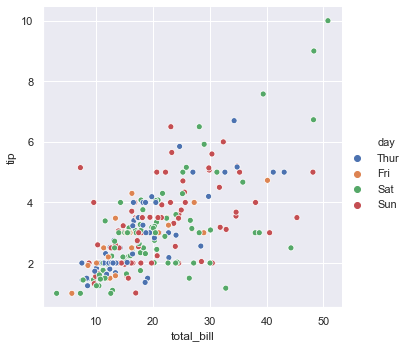

In [9]:
# Figure-level interface for drawing relational plots onto a FacetGrid
sns.relplot(x="total_bill", y="tip", hue="day", data=tips)

The relationship between total bill and tip by meal time (Lunch, Dinner)

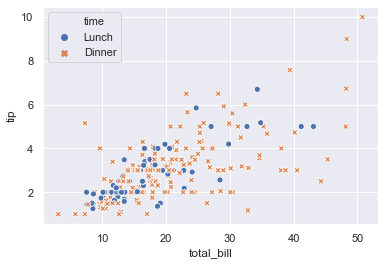

In [12]:
# Scatter plot with options for several semantic groupings
sns.scatterplot(x="total_bill", y="tip", hue="time", style="time", data=tips)

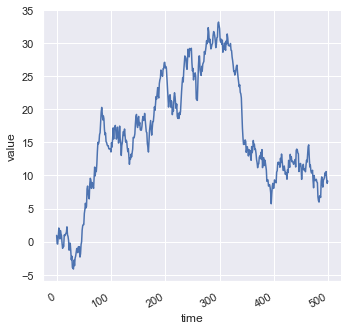

2:80: E501 line too long (81 > 79 characters)


In [15]:
# Line plot
df = pd.DataFrame(dict(time=np.arange(500), value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

#### Categorical Plots

Explore the categorical trends in data.

```python
sns.catplot()
sns.stripplot()
sns.swarmplot()
sns.boxplot()
sns.violinplot()
sns.boxenplot()
sns.pointplot()
sns.barplot()
sns.countplot()
```

The survival rates of the titanic sinking based on sex and class.

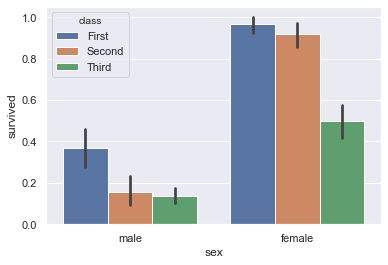

In [21]:
# Show point estimates and confidence intervals with scatterplot glyphs
sns.barplot(x="sex", y="survived", hue="class", data=titanic)

The numbers of observations (datapoints) for each deck.

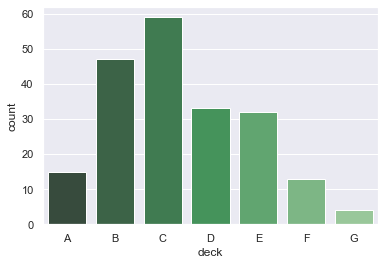

In [22]:
# Show count of observations
sns.countplot(x="deck", data=titanic, palette="Greens_d")

Distribution of males by age and whether they are alive.

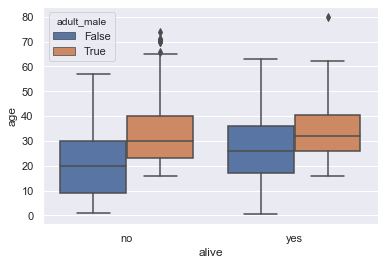

In [24]:
sns.boxplot(x="alive", y="age", hue="adult_male", data=titanic)

Petal length data categorized by species.

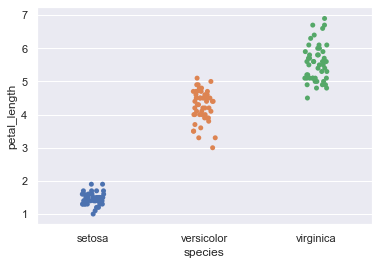

In [27]:
# Categorical scatterplot
sns.stripplot(x="species", y="petal_length", data=iris)

#### Distribution Plots

Show the distribution of data

```python
sns.jointplot()
sns.pairplot()
sns.distplot()
sns.kdeplot()
sns.rugplot()
```

Show the pairwise relationship between each categorical variable in the dataframe. In this case, categorized by species.

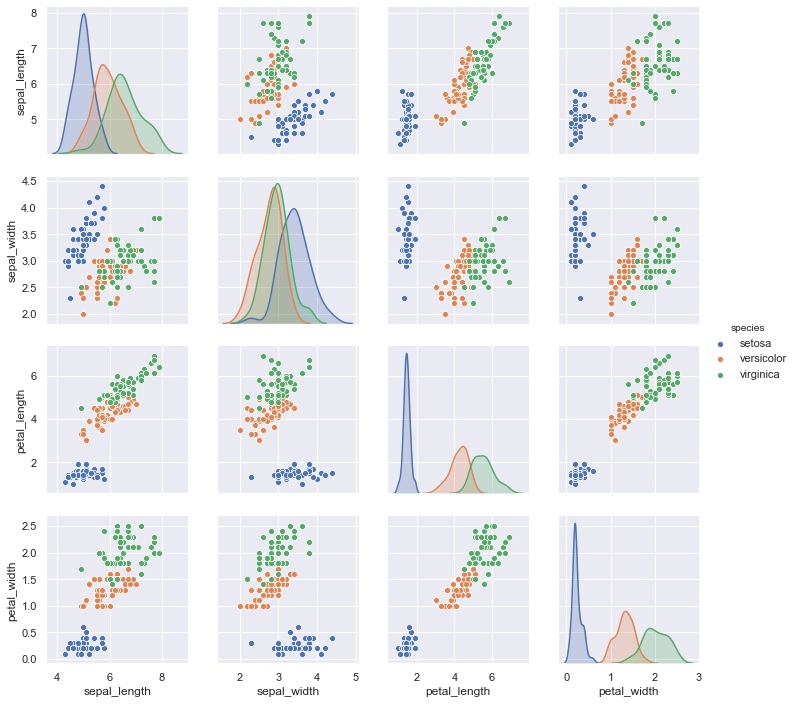

In [32]:
sns.pairplot(iris, hue='species')

Show the distribution of data along each axis.

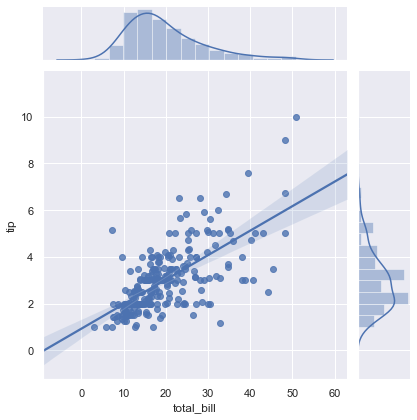

In [30]:
sns.jointplot("total_bill", "tip", data=tips, kind="reg")

#### Regression Plots

Visual analysis of relationships among variables; visual exploration of data patterns

```python
sns.lmplot()
sns.regplot()
sns.residplot()
```

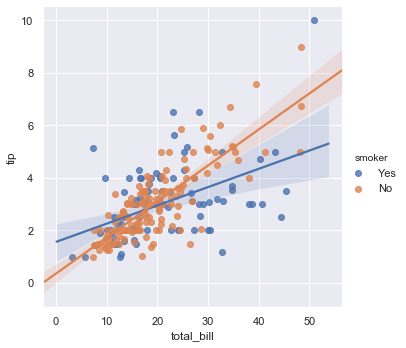

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

#### Matrix Plots

Color-coded grids with rows data, columns data, and values

```python
sns.heatmap()
sns.clustermap()
```

Heatmap of randomly generated data

In [31]:
uniform_data = np.random.rand(10, 12)

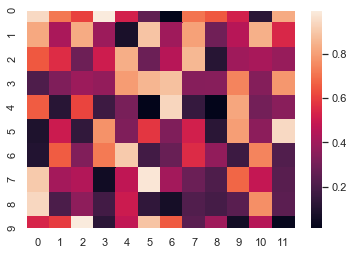

In [35]:
ax = sns.heatmap(uniform_data)

#### Grids of Multiple Plots

```python
sns.FacetGrid()
sns.PairGrid()
sns.JointGrid()
```

**FacetGrid Class:** Multi-plot grid for plotting conditional relationships.

The plot below shows how you can use the FacetGrid Class to plot total bill vs tip with colums as time (Lunch, Dinner)

The general workflow for FacetGrid is:

1) Initialize FacetGrid object

2) Use the FacetGrid.map() function to add your plotting functions.

3) Tweak plts as desired to change axis labels, etc.

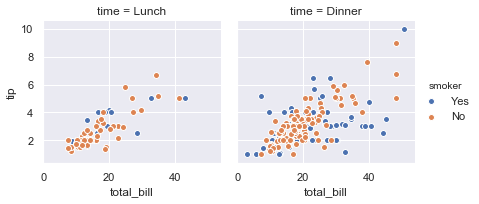

In [34]:
g = sns.FacetGrid(tips, col="time",  hue="smoker")
g = (g.map(plt.scatter, "total_bill", "tip", edgecolor="w")
     .add_legend())

**PairGrid:** Subplot grid for plotting pairwise relationships in a dataset.

This class maps each variable in a dataset onto a column and row in a grid of multiple axes. 

We can have different plots on different axes however using methods of the PairGrid Class (eg. `map_upper()`, `map_lower()`, `map_diag()`)

In [36]:
iris = sns.load_dataset('iris')

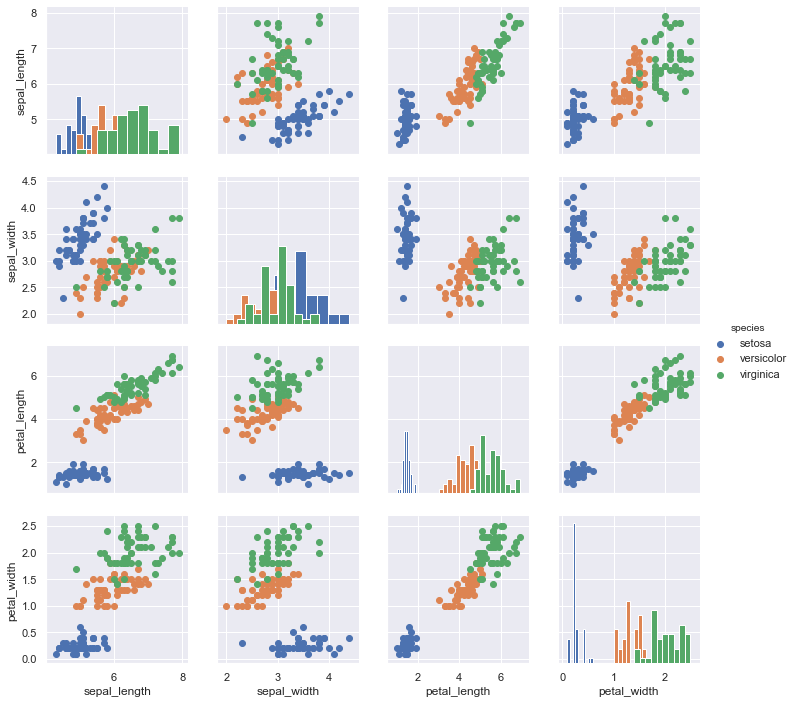

In [38]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist)  # plot histograms on the diagonal
g = g.map_offdiag(plt.scatter)  # plot scatterplots on the non-diagonals
g = g.add_legend()

**JointGrid:** Grid for drawing a bivariate plot with marginal univariate plots.

JointGrids allow us to draw plots with two variables alongside plots for each variable. You can see in the plot below. The total bill it plotted against tip (bivariate) and the distribution of the total bill (univariate) is plotted above and tip (univariate) is plotted to the right.

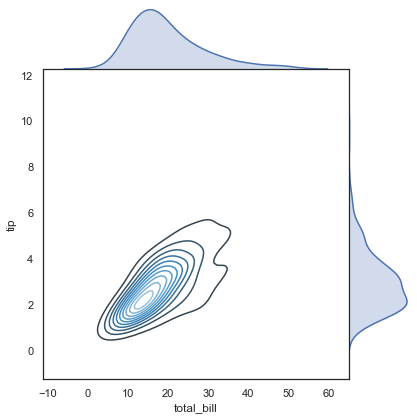

In [43]:
sns.set_style("white")  # makes it look slicker

g = sns.JointGrid(x="total_bill", y="tip", data=tips, space=0)
g = g.plot_joint(sns.kdeplot, cmap="Blues_d")
g = g.plot_marginals(sns.kdeplot, shade=True)

We will start by loading a few different datasets then go through examples of how we can use seaborn to visualize that is going on with our data.

## Exploring the planets dataset

**Planets Dataset Description:** The planets dataset gives information on 1000+ planets that astronomers have discovered around other stars (*exoplanets*) up to 2014. The column descriptions are in the table below.

| Column  | Description  |
|---|---|
| `method` | method of discovery |
| `number` | TBD |
| `orbital_period` | the orbital period of the planet |
| `mass` | mass of the planet |
| `distance` | distance from TBD |
| `year` | year of discovery |

Let's start by checking out what our dataset looks like. Use pandas dataframe `head()` function to see the first check of our data.

In [96]:
planets = sns.load_dataset('planets')

In [97]:
# Check out the head of the dataset
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [98]:
# Checkout the datatypes we are working with
planets.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [101]:
# Determine the unique Methods in the methods column
methods = planets['method'].unique()

np.set_printoptions(threshold=np.inf)
print(methods)
np.set_printoptions(threshold=5)

['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Transit Timing Variations' 'Orbital Brightness Modulation'
 'Microlensing' 'Pulsar Timing' 'Pulsation Timing Variations']


One thing that is always important to do it checkout where there is missing data and what the distribution of the data looks like so we can either fill the missing data in with 0s or perhaps drop the rows where there is missing data.

In [102]:
s1 = planets.isna().sum()
s2 = planets.count()
planets_missing = pd.concat([s1, s2], axis=1,
                            keys=['missing', 'count']).transpose()
planets_missing

,method,number,orbital_period,mass,distance,year
missing,0,0,43,522,227,0
count,1035,1035,992,513,808,1035


So we have all of the data for year, method and number but are missing quite a bit from orbital period, mass and distance. 

For the sake of this tutorial we are going to just fill missing data with 0's but in general you would almost never fill in or ditch data that is incomplete without making serious considerations because it could change the distribution of your data significantly.

In [104]:
planets_clean = planets.fillna(0)

One of the first things we almost always want to check out is how our data is distributed. This will help inform how we interpret data relationships down the road.

This is what I am curious about:

1) How many datapoints do we have for each year?

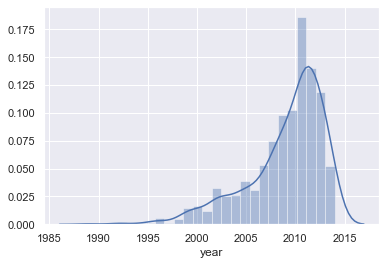

In [105]:
# Distribution of data by year
sns.distplot(planets_clean['year'])

2) How many datapoints we have for each method of discovery

[Text(0, 0, 'Radial Velocity'),
 Text(0, 0, 'Transit'),
 Text(0, 0, 'Imaging'),
 Text(0, 0, 'Microlensing'),
 Text(0, 0, 'Eclipse Timing Variations'),
 Text(0, 0, 'Pulsar Timing'),
 Text(0, 0, 'Transit Timing Variations'),
 Text(0, 0, 'Orbital Brightness Modulation'),
 Text(0, 0, 'Astrometry'),
 Text(0, 0, 'Pulsation Timing Variations')]

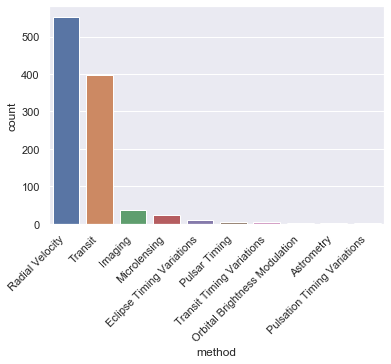

In [135]:
g = sns.countplot(x='method', data=planets_clean,
                  order=planets_clean['method'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=45,
                  horizontalalignment='right')

As we can see we can see we have way more datapoints for some methods than others.

Let's take a look at the relationship between method of discovery, year of discovery and distance from us.

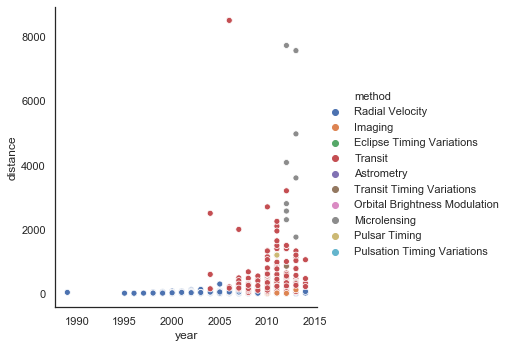

In [126]:
sns.relplot(x="year", y="distance", hue="method", data=planets)

Looks like more planets were discovered in later years. That may have to do with the advancement of space technologies. We can also see that initially Radial Velocity the most common discovery method while later Transit and other techniques became more popular.

Let's explore the relationship between orbital period and method of discovery.

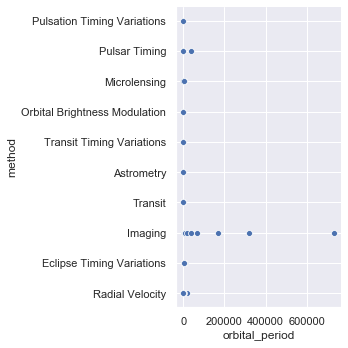

In [248]:
sns.relplot(x='orbital_period', y='method', data=planets)

We can better see how the data is spread out per method using a box or violin plot. Lets also just look at lower orbital periods so the couple outliers don't make our graphs look bad.

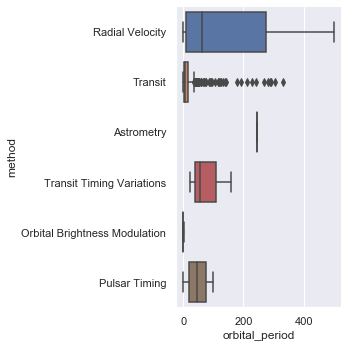

In [115]:
sns.catplot(x="orbital_period", y="method",
            data=planets[planets.orbital_period < 500],
            kind='box')

## Exploring the diamonds dataset (briefly)

**Diamonds Dataset Description:** The diamonds dataset gives information diamonds. The column descriptions are in the table below.

| Column  | Description  |
|---|---|
| `carat` | carat of the diamond |
| `cut` | category of cut |
| `color` | color of diamond |
| `clarity` | category of clarity |
| `depth` | depth you can see into the diamond? |
| `table` | TBD |
| `price` | TBD |
| `x` | x-dimension |
| `y` | y-dimension |
| `z` | z-dimension |

Let's start by checking out what our dataset looks like.

In [9]:
diamonds = sns.load_dataset('diamonds')

In [10]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
# Check if there is any missing data
s1 = diamonds.isna().sum()
s2 = diamonds.count()
diamonds_missing = pd.concat([s1, s2], axis=1, keys=['missing', 'count'])
diamonds_missing

,missing,count
carat,0,53940
cut,0,53940
color,0,53940
clarity,0,53940
depth,0,53940
table,0,53940
price,0,53940
x,0,53940
y,0,53940
z,0,53940


Let's take a quick look at a statistical summary of our data.

In [12]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


What are the categories we are working with for cuts, colors and clarities?

In [13]:
np.set_printoptions(threshold=np.inf)
print('Unique Cuts: {}'.format(diamonds['cut'].unique()))
print('Unique Colors: {}'.format(diamonds.color.unique()))
print('Unique Clarities: {}'.format(diamonds.clarity.unique()))
np.set_printoptions(threshold=5)

Unique Cuts: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
Unique Colors: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
Unique Clarities: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


We can use a pairplot to checkout the pairwise (relationships in each column) from a high level perspective.

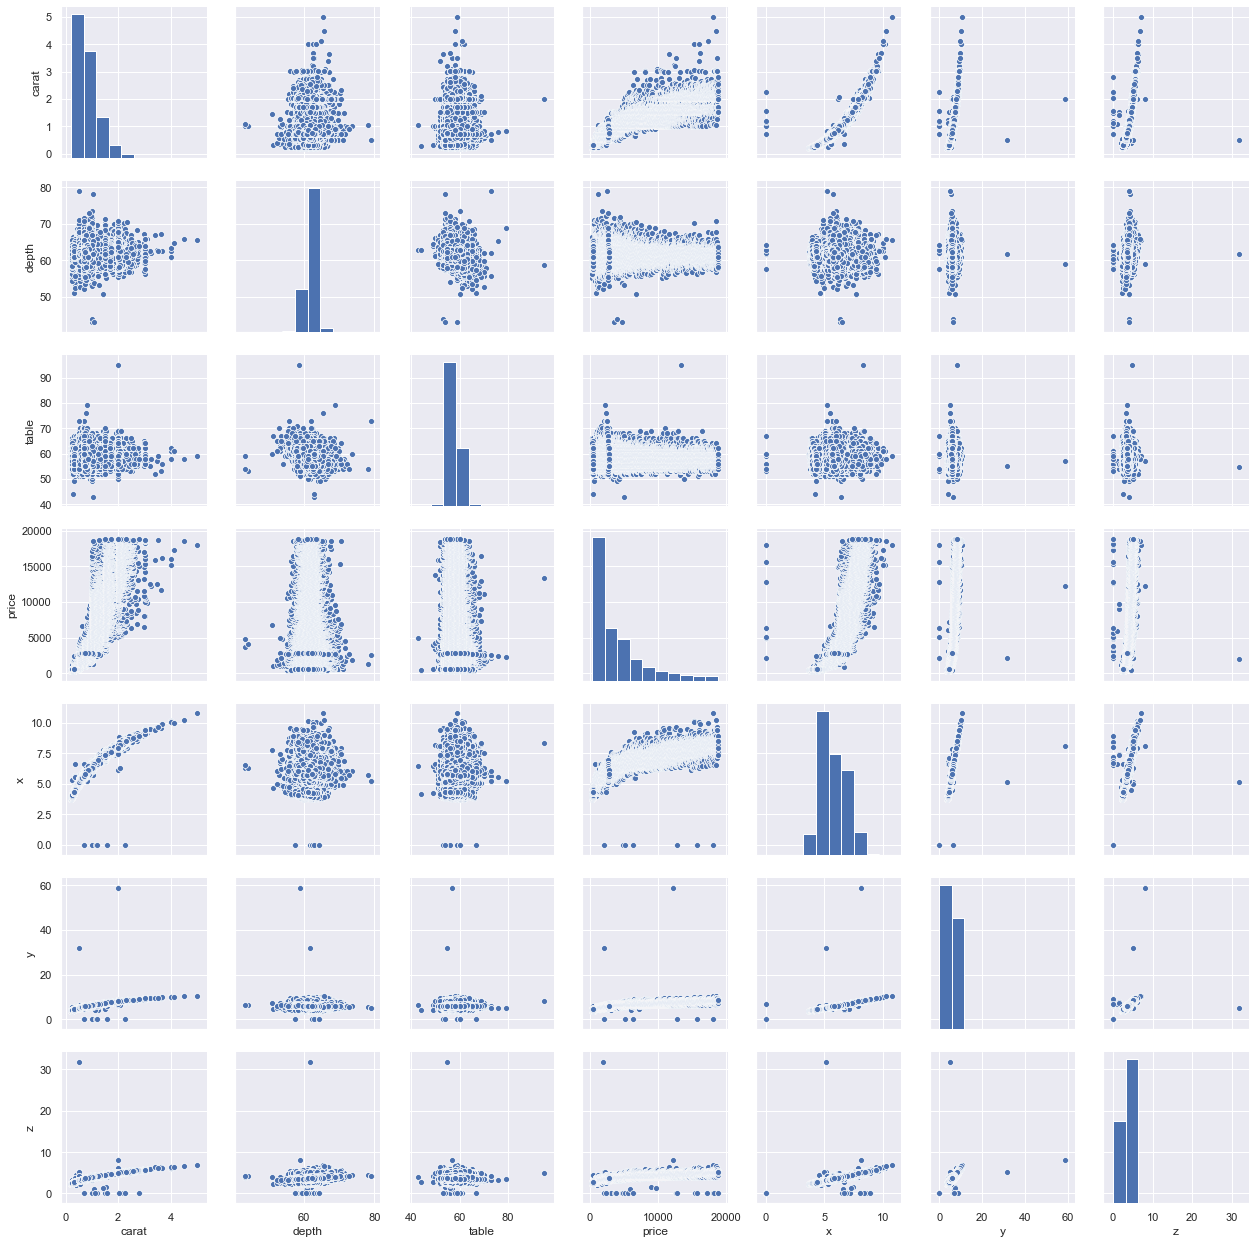

In [62]:
sns.pairplot(diamonds)

Then we can examine a specific relationship more closely. I am interested in the relationship between carat and price. But I think I'd like to look at the categories separately, I'll give each category a different hue. 

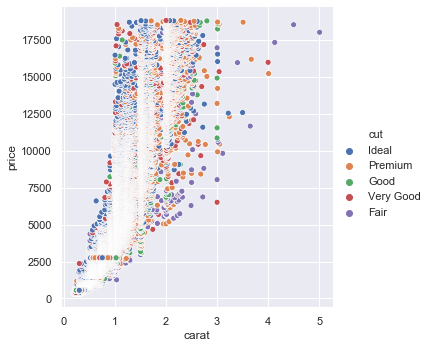

In [63]:
sns.relplot(x="carat", y="price", hue="cut", data=diamonds)

To emphasize the difference between the classes, and to improve accessibility, you can use a different marker style for each class:

That is still a lot of data to look at...perhaps it would be easier to separate the graphs.

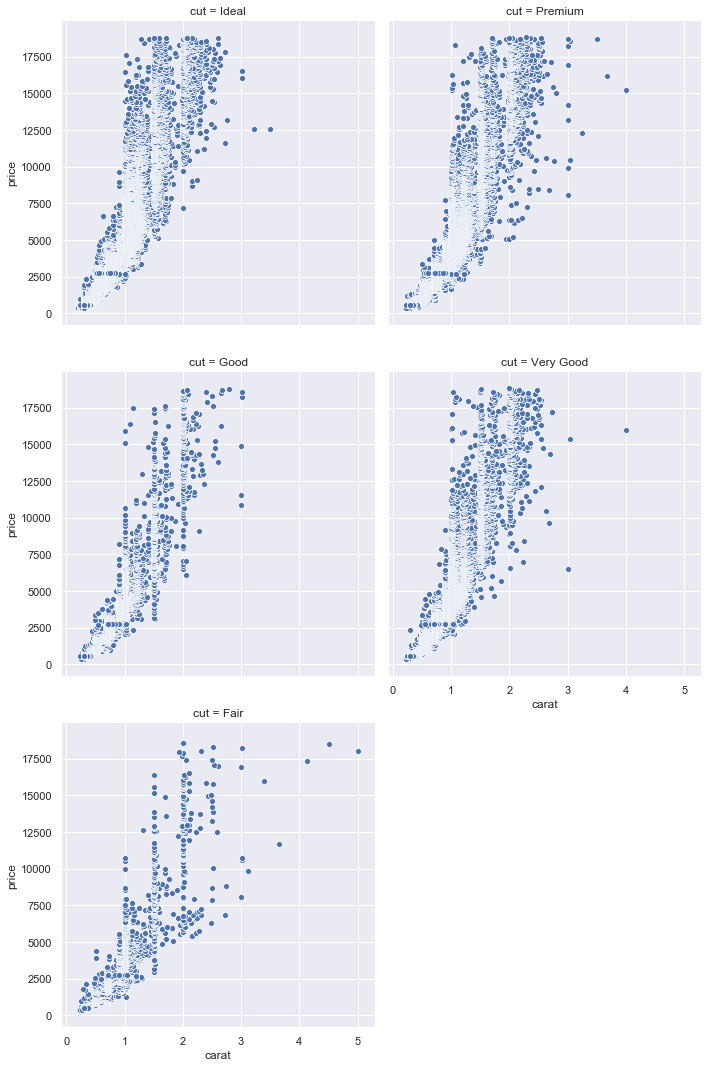

In [65]:
sns.relplot(x="carat", y="price", col="cut", col_wrap=2, data=diamonds)

They all seem to follow a similar trend. We can examine that trend by drawing a line of best fit through the data.

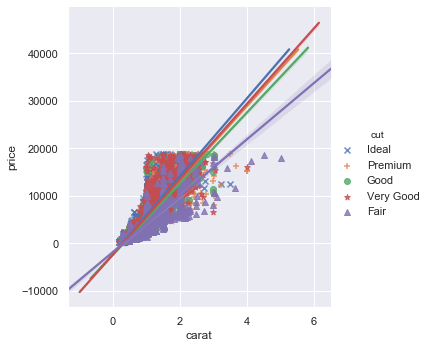

In [73]:
sns.lmplot(x="carat", y="price", hue="cut",
           data=diamonds,
           markers=['x', '+', 'o', '*', '^'])

*Note: For initial examination this graph gives us an idea about the strength of the relationship between carat and price per each cut however before any presention, publishing, etc this graph would need to be significantly cleaned up. You would never show a graph that is so cluttered in this way in reality.*

It may also be interesting to use a categorical plot to examine cut categories against price.

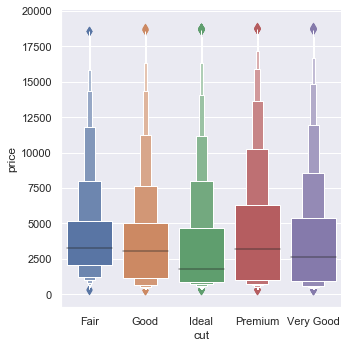

In [80]:
sns.catplot(x="cut", y="price", kind="boxen", data=diamonds.sort_values("cut"))

At this point we've been walked through the process of exploring a could different datasets. Again, in reality we would explore the data in far greater detail but the purpose of this tutorial is to get you comfortable with using commonly used Seaborn plotting tools. 

I hope you feel good and comfy, now your turn to dive into the exercises :)

# Exercises

Choose any TWO of the following datasets that interest you (that we haven't already worked with!) and explore the data in such a way that you could give a presentation on the information that can be gathered from it.

In [39]:
dataset_names = sns.get_dataset_names()
dataset_names

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']